In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


%matplotlib inline


# Ensemble Classification




In [2]:

Dp0=pd.read_csv('../datasets/S_MPOS_27_100',delimiter=" ",header=None)
Dn0=pd.read_csv('../datasets/S_MNEG_27_100',delimiter=" ",header=None)

Dp0s=Dp0
Dn0s=Dn0.sample(Dp0s.index.size)
Dn0s=Dn0.sample(2000)


D=pd.concat([Dp0s,Dn0s])
X=D.values
y=np.append(np.zeros([Dp0s.index.size,1]),np.ones([Dn0s.index.size,1]))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [5]:
clf = RandomForestClassifier(max_depth=None, class_weight='balanced',n_estimators=300)
y_pred = clf.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"% (y_test.shape[0],(y_test != y_pred).sum()))

acc=clf.score(X_test,y_test)
y_pred=clf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1], pos_label=1)
auc=metrics.auc(fpr, tpr)

print(acc,auc)

Number of mislabeled points out of a total 1102 points : 480
0.5644283121597096 0.5260387023335231


In [8]:
clf = RandomForestClassifier(max_depth=8, class_weight='balanced',n_estimators=100)
y_pred = clf.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"% (y_test.shape[0],(y_test != y_pred).sum()))

acc=clf.score(X_test,y_test)
y_pred=clf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1], pos_label=1)
auc=metrics.auc(fpr, tpr)

print(acc,auc)

Number of mislabeled points out of a total 1102 points : 486
0.558983666061706 0.5605791121229369


In [9]:
clf = RandomForestClassifier(max_depth=None, class_weight='balanced',n_estimators=100)
y_pred = clf.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"% (y_test.shape[0],(y_test != y_pred).sum()))

acc=clf.score(X_test,y_test)
y_pred=clf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1], pos_label=1)
auc=metrics.auc(fpr, tpr)

print(acc,auc)

Number of mislabeled points out of a total 1102 points : 480
0.5644283121597096 0.525220546385885


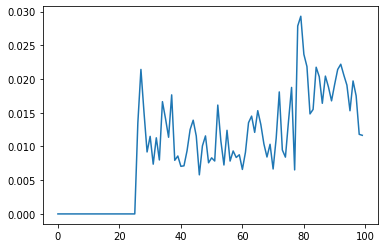

In [11]:
plt.plot(clf.feature_importances_)

In [15]:
# compare over training with decision trees

In [19]:
clf = AdaBoostClassifier(n_estimators=1000)
y_pred = clf.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"% (y_test.shape[0],(y_test != y_pred).sum()))

acc=clf.score(X_test,y_test)
y_pred=clf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1], pos_label=1)
auc=metrics.auc(fpr, tpr)

print acc,auc

Number of mislabeled points out of a total 1102 points : 127
0.8847549909255898 0.5680458155705681
